<a href="https://colab.research.google.com/github/ckraju/mits/blob/master/simple-recurrent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__


Using TensorFlow backend.


'2.2.5'

In [2]:
from keras.layers import SimpleRNN

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [6]:

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 21s 1ms/step - loss: 0.5611 - acc: 0.6997 - val_loss: 0.3919 - val_acc: 0.8410
Epoch 2/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.3506 - acc: 0.8569 - val_loss: 0.3470 - val_acc: 0.8572
Epoch 3/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.2759 - acc: 0.8932 - val_loss: 0.4930 - val_acc: 0.7560
Epoch 4/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.2294 - acc: 0.9149 - val_loss: 0.3331 - val_acc: 0.8702
Epoch 5/10
20000/20000 [==============================] - 20s 992us/step - loss: 0.1751 - acc: 0.9369 - val_loss: 0.3823 - val_acc: 0.8454
Epoch 6/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.1424 - acc: 0.9501 - val_loss: 0.4004 - val_acc: 0.8648
Epoch 7/10
20000/20000 

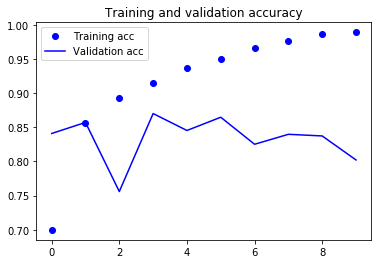

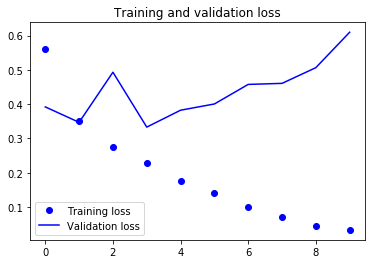

In [7]:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 95s 5ms/step - loss: 0.5406 - acc: 0.7408 - val_loss: 0.3682 - val_acc: 0.8528
Epoch 2/10
20000/20000 [==============================] - 94s 5ms/step - loss: 0.3049 - acc: 0.8810 - val_loss: 0.3870 - val_acc: 0.8276
Epoch 3/10
20000/20000 [==============================] - 94s 5ms/step - loss: 0.2410 - acc: 0.9089 - val_loss: 0.2996 - val_acc: 0.8826
Epoch 4/10
20000/20000 [==============================] - 94s 5ms/step - loss: 0.2074 - acc: 0.9229 - val_loss: 0.3054 - val_acc: 0.8886
Epoch 5/10
20000/20000 [==============================] - 95s 5ms/step - loss: 0.1841 - acc: 0.9345 - val_loss: 0.3623 - val_acc: 0.8556
Epoch 6/10
20000/20000 [==============================] - 94s 5ms/step - loss: 0.1686 - acc: 0.9405 - val_loss: 0.3853 - val_acc: 0.8492
Epoch 7/10
20000/20000 [==============================] - 94s 5ms/step - loss: 0.1471 - acc: 0.9487 - val_loss: 0.3184 - val_acc:

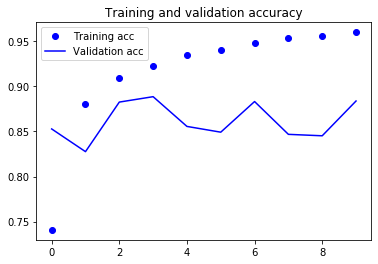

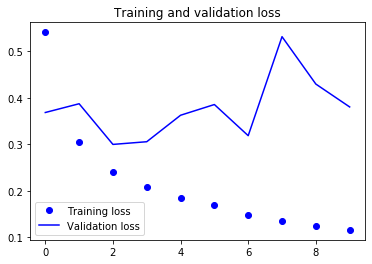

In [9]:


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

